# Blocking experiments
This notebook shows some experiments with the different implemented blocking and matching functions.

In [1]:
from erpub.pipeline.pipeline import Pipeline
from erpub.pipeline.blocking import naive_all_pairs, same_year_of_publication
from erpub.pipeline.matching import jaccard_similarity, vector_embeddings
from erpub.experiment_utils import plot_blocking_comparison, evaluate_blocking_method, timing_wrapper
import numpy as np


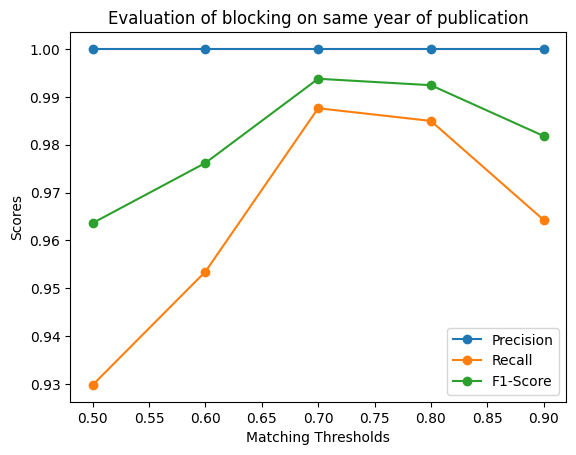

Average baseline execution time: nan
Average same year execution time: nan


/home/frederik/ml-env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/frederik/ml-env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [2]:
base_pipeline = Pipeline(
    file_dir="data/prepared/",
    blocking_fn=naive_all_pairs,
    matching_fns={"paper_title": jaccard_similarity},
    verbose=False,
)
same_year_pipeline = Pipeline(
    file_dir="data/prepared/",
    blocking_fn=same_year_of_publication,
    matching_fns={"paper_title": jaccard_similarity},
    verbose=False,
)

thresholds = np.linspace(0.8, 1.0, num=4, endpoint=False)
precisions, recalls, f1_scores = [], [], []
baseline_times, same_year_times = [], []

for threshold in thresholds:
    base_path = f"experiments/blocking_baseline_matching_jaccard/threshold_{threshold}"
    base_pipeline.run(dir_name=base_path, similarity_threshold=threshold)

    same_year_path = f"experiments/blocking_same_year_matching_jaccard/threshold_{threshold}"
    same_year_pipeline.run(dir_name=same_year_path, similarity_threshold=threshold)

    precision, recall, f1_score = evaluate_blocking_method(
        ground_truth=base_path, experiment=same_year_path
    )
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

plot_blocking_comparison(
    "Evaluation of blocking on same year of publication",
    thresholds,
    precisions,
    recalls,
    f1_scores,
)
print(f"Average baseline execution time: {np.mean(baseline_times)}")
print(f"Average same year execution time: {np.mean(same_year_times)}")

2024-01-28 12:42:03,221 - The pipeline will be built with these files: ['data/prepared/ACM_1995_2004.csv', 'data/prepared/DBLP_1995_2004.csv']
2024-01-28 12:42:03,319 - Loaded csv successfully into pandas dataframe


2024-01-28 12:42:07,548 - Pipeline initialized
2024-01-28 12:42:07,549 - The pipeline will be built with these files: ['data/prepared/ACM_1995_2004.csv', 'data/prepared/DBLP_1995_2004.csv']
2024-01-28 12:42:07,578 - Loaded csv successfully into pandas dataframe
2024-01-28 12:42:11,379 - Pipeline initialized
2024-01-28 12:42:11,380 - Preprocessing has been skipped
2024-01-28 12:42:11,381 - Create blocks through blocking function naive_all_pairs
2024-01-28 12:42:11,384 - Amount of different blocks: 1
2024-01-28 12:42:11,386 - Attribute 'paper_title' is matched using function vector_embeddings
2024-01-28 12:42:13,495 - 5484718 pairs are found.
2024-01-28 12:42:13,495 - Writing the matched paper_ids to directory experiments/blocking_baseline_matching_vector/threshold_0.8
2024-01-28 13:16:57,053 - Preprocessing has been skipped
2024-01-28 13:16:57,054 - Create blocks through blocking function same_year_of_publication
2024-01-28 13:16:57,058 - Amount of different blocks: 10
2024-01-28 13:16:

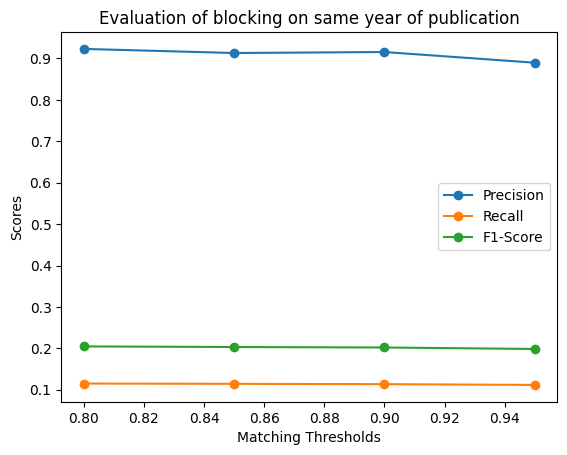

In [2]:
base_pipeline = Pipeline(
    file_dir="data/prepared/",
    blocking_fn=naive_all_pairs,
    matching_fns={"paper_title": vector_embeddings},
    embeddings_for_matching="embeddings/glove.6B.50d.txt",
    verbose=True,
)
same_year_pipeline = Pipeline(
    file_dir="data/prepared/",
    blocking_fn=same_year_of_publication,
    matching_fns={"paper_title": vector_embeddings},
    embeddings_for_matching="embeddings/glove.6B.50d.txt",
    verbose=True,
)

thresholds = np.linspace(0.8, 1.0, num=4, endpoint=False)
precisions, recalls, f1_scores = [], [], []

for threshold in thresholds:
    base_path = f"experiments/blocking_baseline_matching_vector/threshold_{threshold}"
    base_pipeline.run(dir_name=base_path, similarity_threshold=threshold)

    same_year_path = f"experiments/blocking_same_year_matching_vector/threshold_{threshold}"
    same_year_pipeline.run(dir_name=same_year_path, similarity_threshold=threshold)
    precision, recall, f1_score = evaluate_blocking_method(
        ground_truth=base_path, experiment=same_year_path
    )
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

plot_blocking_comparison(
    "Evaluation of blocking on same year of publication",
    thresholds,
    precisions,
    recalls,
    f1_scores,
)